In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df.shape
df.describe(include = 'all')
df.info()
df.isnull().sum()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB
0


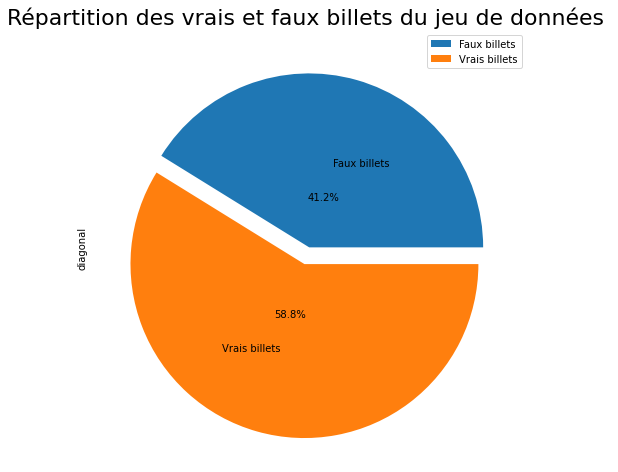

In [3]:
data = df.groupby("is_genuine").count()

data.plot.pie(y="diagonal",figsize=(8, 8),
                                explode = [0, 0.1],
                                labels = ["Faux billets", "Vrais billets"],
                                autopct = '%1.1f%%',
                                pctdistance = 0.3, labeldistance = 0.5)

plt.title('Répartition des vrais et faux billets du jeu de données ', 
  loc='center', 
  fontsize=22)
plt.savefig('graphiques/01. DESCRIBE_repartition_vrai_faux.png')
plt.show()



,W,pval,normal
diagonal,0.993177,6.106325e-01,True
height_left,0.992723,5.533670e-01,True
height_right,0.988121,1.625284e-01,True
margin_low,0.935401,6.225721e-07,False
margin_up,0.988917,2.044352e-01,True
length,0.932463,3.714225e-07,False


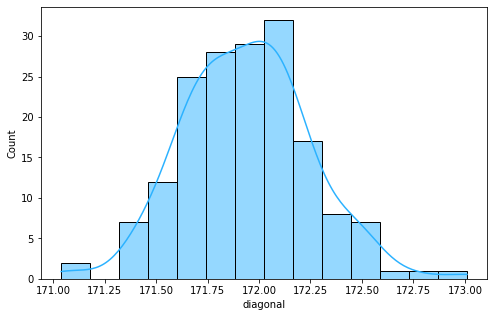

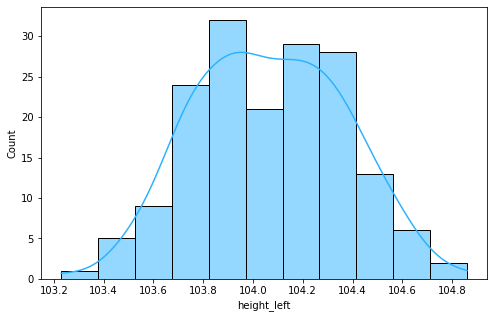

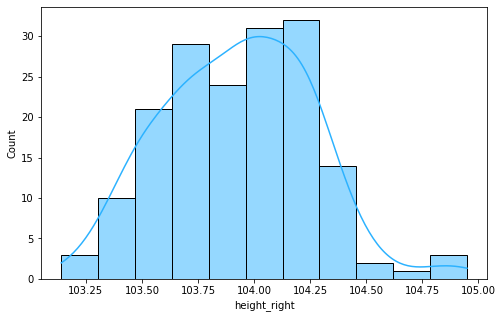

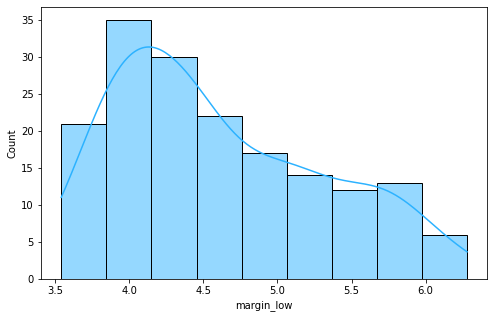

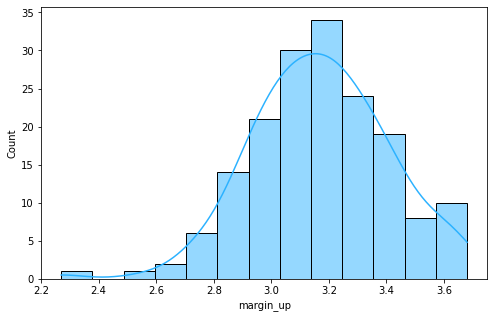

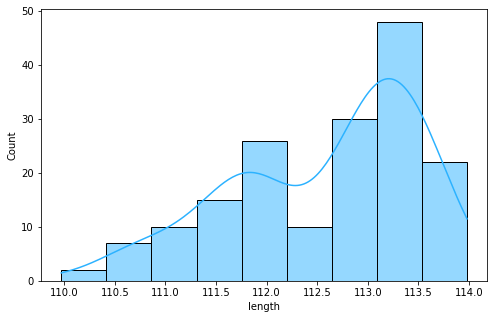

In [6]:
#Le calcul de la distribution empirique est la première étape pour la représentation graphique d'une variable qualitative

for column in df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']] :
    plt.figure(figsize = (8,5))
    sns.histplot(x=column, data=df, kde=True, color='#2cb2ff')
    plt.savefig("graphiques/02. Histogramme " + str(column) +".jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

    plt.xlabel(column)
    
    
    
    #normality of variables in df
import pingouin as pg
pg.normality(df, method='shapiro', alpha=0.05).drop('is_genuine')

#normality: test de normalité univarié.

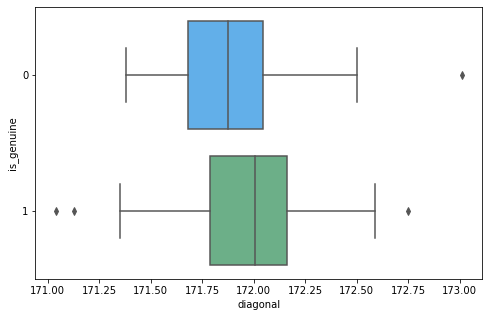

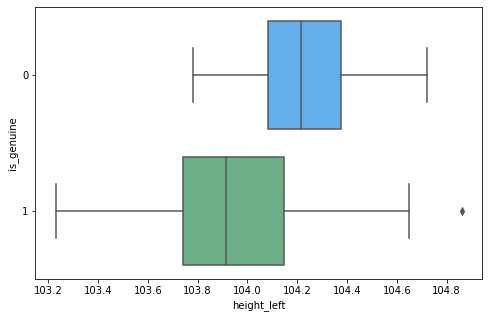

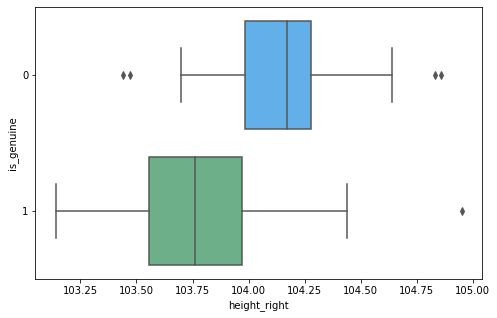

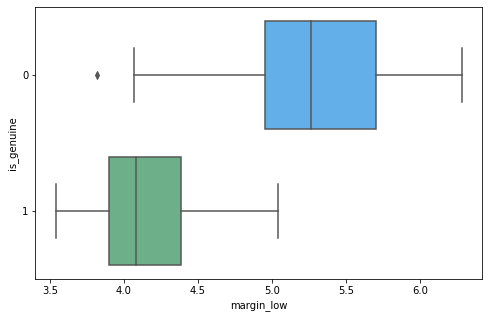

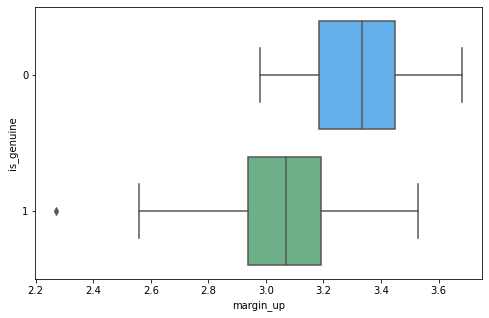

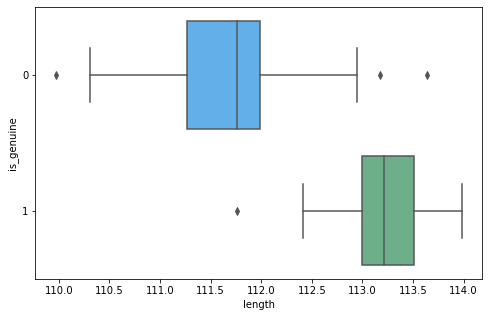

In [7]:
#Analyse Bivariée

for column in df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']] : 
        plt.figure(figsize = (8,5))
        sns.boxplot( x=column, y='is_genuine', data=df, orient='h', palette=('#4cb2ff', '#61ba86'))
        plt.savefig("graphiques/03. Boxplot " + str(column) +".jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

In [ ]:
g = sns.pairplot(df, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
plt.savefig("graphiques/04. Pairplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
plt.show()

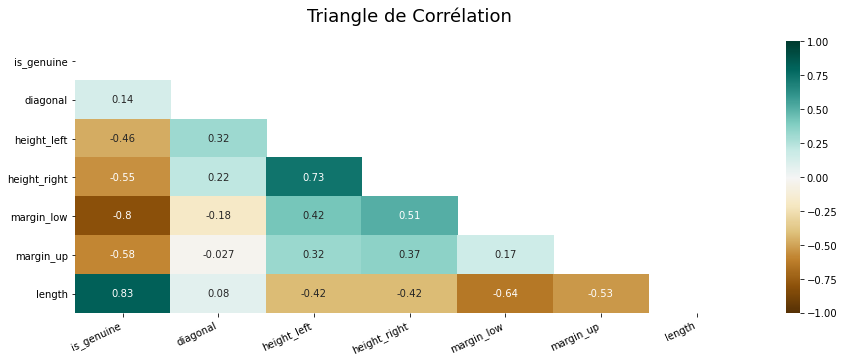

In [5]:
#convert bool to int
df['is_genuine'] = df['is_genuine'].astype(int)

plt.figure(figsize=(15,5))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.xticks(rotation=25, ha='right')
plt.title('Triangle de Corrélation',  fontsize=18, pad=20)
plt.savefig("graphiques/05. Triangle de corrélation.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
    #plt.show()